> Welcome to the project! You will find tips in quoted sections like this to help organize your approach to your investigation.

# Project: Investigate a Pima Indians Diabetes Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#pre">Prediction analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Diabetes is one of the deadliest diseases in the world. It is not only a disease but also creator of different kinds of diseases like heart attack, blindness etc. The normal identifying process is that patients need to visit a diagnostic center, consult their doctor, and sit tight for a day or more to get their reports. So, the objective of this project is to identify whether the patient has diabetes or not based on diagnostic measurements.. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.
>
> The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

> About Dataset:

>> Pregnancies: No. of times pregnant

>> Glucose: Plasma Glucose Concentration (mg/dl)

>> Blood Pressure: Diastolic Blood Pressure(mmHg)

>> Skin Thickness:A value used to estimate body fat. Normal Triceps SkinFold Thickness in women is 23mm. Higher thickness leads to obesity and chances of diabetes increases.

>> Insulin: 2-Hour Serum Insulin (mu U/ml)

>> BMI: Body Mass Index (weight in kg/ height in m2)

>> Diabetes Pedigree Function: It provides information about diabetes history in relatives and genetic relationship of those relatives with patients. Higher Pedigree Function means patient is more likely to have diabetes.

>> Age:Age (years)

>> Outcome: Class Variable (0 or 1) where ‘0’ denotes patient is not having diabetes and ‘1’ denotes patient having diabetes.

In [11]:
# Use this cell to set up import statements for all of the packages that you plan to use.
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [12]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
db = pd.read_csv("diabetes.csv")
display(db.duplicated().sum())
db.replace('?',np.NaN,inplace= True)
display(db.isnull().sum())
display(db.info())
db.head()
db.Outcome.value_counts()



0

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

0    500
1    268
Name: Outcome, dtype: int64

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [13]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Replace this header name!)

<AxesSubplot:>

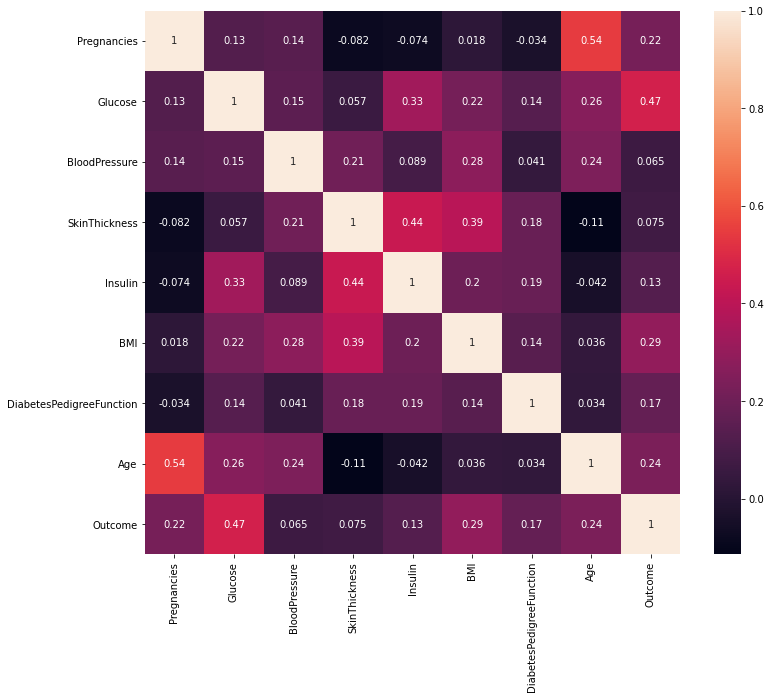

In [14]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
fig = plt.figure(figsize= (12,10))
sns.heatmap(db.corr(), annot = True)

### Research Question 2  (Replace this header name!)

<AxesSubplot:>

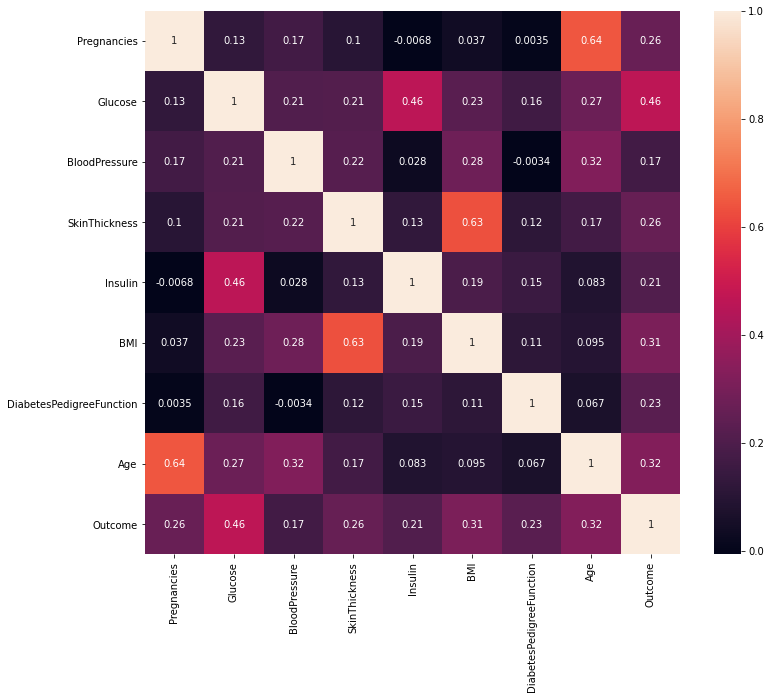

In [15]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

skin_df = db[db.SkinThickness != 0 ]
fig = plt.figure(figsize= (12,10))
sns.heatmap(skin_df.corr(), annot = True)

<AxesSubplot:>

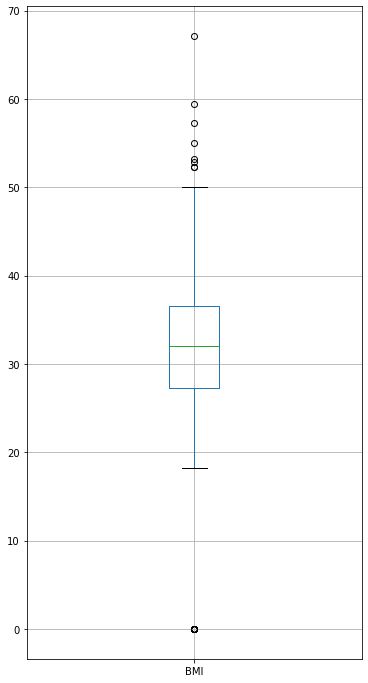

In [16]:
fig = plt.figure(figsize= (6,12))
db.boxplot(column=["BMI"])

In [17]:
top = 50
bottom = 15
segment = 0.5

print("before" , db.SkinThickness.value_counts()[0])
for i in range(int((top-bottom)/segment)):
    temp_mean = skin_df[ (skin_df.BMI > bottom+i*segment) & (skin_df.BMI < bottom + (i+1) * segment) ].SkinThickness.mean()
    db.loc[ ( db.SkinThickness == 0 ) & (db.BMI > bottom+i*segment) & (db.BMI < bottom + (i+1) * segment) , "SkinThickness" ] = temp_mean
print("after" , db.SkinThickness.value_counts()[0])

before 227
after 54


> **Note: if you have more questions and insights don't hesitate to do it**

<a id='pre'></a>
## Build a Prediction Model


In [18]:
# Make a feature scaling
scaler = StandardScaler()
scaler.fit(db.drop(['Outcome'] ,axis= 1))
scaled = scaler.transform(db.drop(['Outcome'] ,axis=1))
db_scaled = pd.DataFrame( scaled , columns = db.columns[:-1])

db_scaled['Outcome'] = db['Outcome']
db_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.706339,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.205081,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-0.797436,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,-0.296178,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.706339,0.765836,1.409746,5.484909,-0.020496,1


In [19]:
# Split the data into train and test data
train , test = train_test_split(db_scaled, test_size= 0.33 )
train_x = train.drop(['Outcome'],axis = 1)
train_y = train['Outcome']
test_x = test.drop(['Outcome'],axis = 1)
test_y = test['Outcome']

## Compare the performance (Confusion matrix and classification report) of different classifiers (LR, KNN, SVM, DT and RF)

> **Note: use grid search with a suitable range of values to adjust the hyperparameters of DT and SVM and for loop to adjust the k value of KNN**

In [20]:
def fit_and_score(model):
    # print(model)
    model.fit(train_x,train_y)
    predicted = model.predict(test_x)
    # display (model.score(test_x,test_y) ,confusion_matrix( test_y , predicted ))
    # print(classification_report(test_y , predicted))
    return model.score(test_x,test_y)

lr_model = LogisticRegression()
print(lr_model)
print(fit_and_score(lr_model))
print()

best = 0
best_i = 0
for i in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors=i)
    temp = fit_and_score(knn_model)
    if temp > best :
        best = temp
        best_i = i

knn_model= KNeighborsClassifier(best_i)
print(knn_model)
print(fit_and_score(knn_model))
print()
svm_model = SVC()
print(svm_model)
print(fit_and_score(svm_model))
print()

dt_model = DecisionTreeClassifier()
print(dt_model)
print(fit_and_score(dt_model))
print()
rf_model = RandomForestClassifier()
print(rf_model)
print(fit_and_score(rf_model))

LogisticRegression()


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<a id='conclusions'></a>
## Conclusions

> **Tip**: , summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any staFinallytistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work send it and Congratulations!